# Week3授業前課題1
## アヤメの分析
「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

# 問題1
## データの取得
以下のドキュメントを参考にしながら、irisデータセットを読み込みましょう。

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

目的変数も同様にyに格納してください。

（表省略）

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# load iris (dictionary型)
data = load_iris()

# 説明変数
X = pd.DataFrame(data=data.get('data'), 
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
display(X)

# 目的変数
Y = pd.DataFrame(data=data.get('target'),
    columns=['Species'])
display(Y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# 問題2
## データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

（表省略）

In [15]:
df = pd.concat([X, Y], axis=1)
display(df)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 問題3
## データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである`.head()`, `.info()`, `.describe()`, `.isnull()`, `.sum()`や、Seriesのメソッドである`.value_counts`などを使ってみましょう。

In [17]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

display(df.head(4))

df.info()

# 行数: 150
# 型:
#     説明変数: float64(64ビット浮動小数点数) 
#     目的変数: int32(32ビット整数)
# 欠損値: なし

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
# ラベルごとのサンプル数の合計を出力する。

display(df['Species'].value_counts().sort_index())

# 一様に50行ずつ存在する

0    50
1    50
2    50
Name: Species, dtype: int64

In [21]:
# 特徴量に欠損値があるかを確認する。

df_isnull = df.isnull()

display(df_isnull)

_ = [display(df_isnull[x].value_counts()) for x in df_isnull.columns]

# すべての列で欠損値なし

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


False    150
Name: sepal_length, dtype: int64

False    150
Name: sepal_width, dtype: int64

False    150
Name: petal_length, dtype: int64

False    150
Name: petal_width, dtype: int64

False    150
Name: Species, dtype: int64

In [22]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

df.describe()

# about df.describe()
# column単位で以下データを出力
# count: 値がnullでない行の数
# mean: 平均値
# std: 標準偏差
# min: 最小値(=0%)
# 25%, 50%, 75%: パーセンタイル(四分位数)
# max: 最大値(=100%)

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 問題4
## irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

# Irisデータセット
- アメリカの植物学者エドガー・アンダーソンによって計測され、1935年、American Iris Societyの会報にて公開された
- 3種のアヤメの特徴量が格納されたデータセット
- 3種のうち2種は同日・同地点（同じ牧草地）・同計測者によって計測が行われた
- 翌年(1936年)、統計学者・遺伝学であるロナルド・フィッシャーがこのデータを利用したアヤメの線形判別モデルを発表した

# 問題5
## 必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

`.loc`や`.iloc`を使うことになります。この２つはどう違うのかについて説明してください。

In [23]:
# sepal_widthの列を３つの異なる方法で抽出する

# 直接インデックス参照で抽出
display(df['sepal_width'])

# .locを利用
display(df.loc[:, 'sepal_width'])

# .ilocを利用
display(df.iloc[:, 1])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [24]:
# 50番目から99番目までのデータを抽出する
# index=49-98を抽出

display(df.iloc[49:99, :])

,sepal_length,sepal_width,petal_length,petal_width,Species
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1


In [25]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
# index=49-98, column_num=2='petal_length'を抽出

display(df.iloc[49:99, 2])

49    1.4
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
Name: petal_length, dtype: float64

In [26]:
# petal_widthの値が0.2のデータを抽出する

display(df[df['petal_width'] == 0.2])

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## `.loc`と`.iloc`の違い
<dl>
    <dt>.loc</dt>
    <dd>DataFrameの行、列を<strong>ラベル</strong>で抽出する<dd>
    <dt>.iloc</dt>
    <dd>DataFrameの行、列を<strong>番号</strong>で抽出する<dd>
</dl>

# 問題6
## 図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

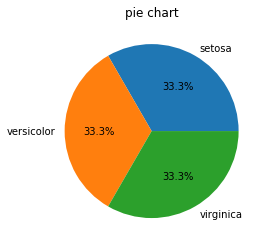

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

iris_series = df['Species'].value_counts().sort_index()

# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)
ax.set_title('pie chart')

_ = ax.pie(iris_series, labels=data.target_names, autopct='%.1f%%')

plt.show()

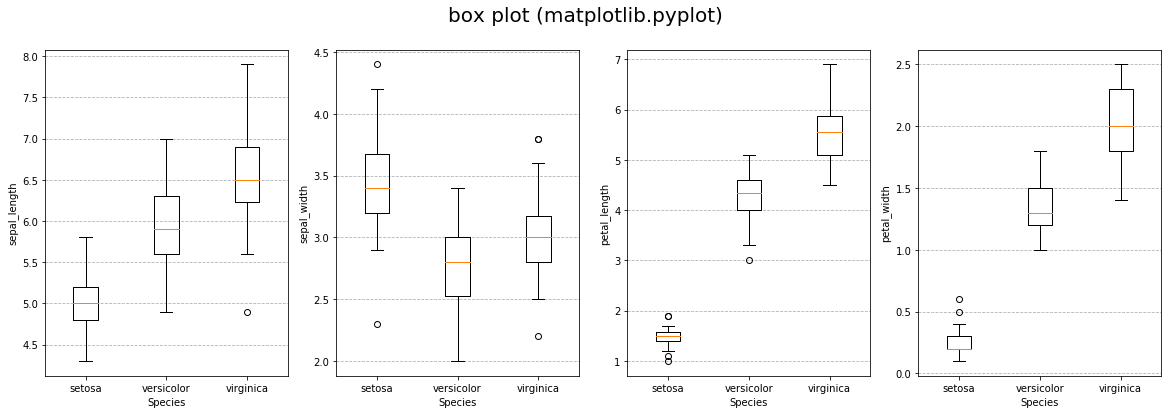

In [28]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
# pyplotを使ってみる

%matplotlib inline
fig = plt.figure(figsize=(20, 6))
fig.suptitle('box plot (matplotlib.pyplot)', fontsize=20)

# 列ごとにプロット
for i, col_name in enumerate(df.columns[:-1]):
    ax = plt.subplot(1, 4, i+1)

    ax.set_xlabel('Species')
    ax.set_ylabel(col_name)

    # ラベルごとにプロット
    ax.boxplot([df[df['Species'] == species_num][col_name]
        for species_num in range(3)]) 

    ax.set_xticklabels(data.target_names)
    ax.grid(linestyle='--', axis='y')

plt.show()

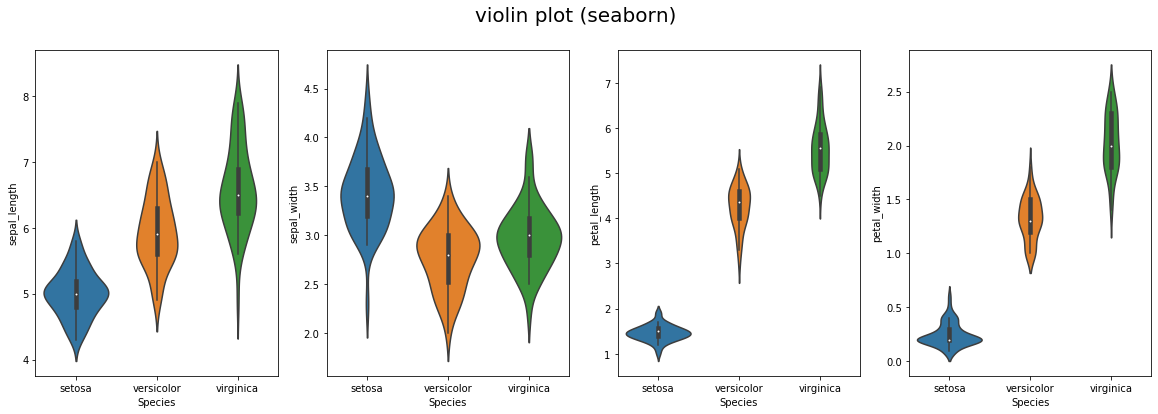

In [29]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
# seabornを使ってみる

%matplotlib inline
fig = plt.figure(figsize=(20, 6))
fig.suptitle('violin plot (seaborn)', fontsize=20)

# 列ごとにプロット
for i, col_name in enumerate(df.columns[:-1]):
    ax = plt.subplot(1, 4, i+1)

    # ラベルごとにプロット
    ax = sns.violinplot(x='Species', y=col_name, data=df)

    ax.set_xticklabels(labels=data.target_names)

plt.show()

# 箱ひげ図 / バイオリン図
## 箱ひげ図
データの特徴を表す値と分布を同時に見ることができる
## バイオリン図
データ分布の形状が直観的に分かる

# 問題7
## 特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

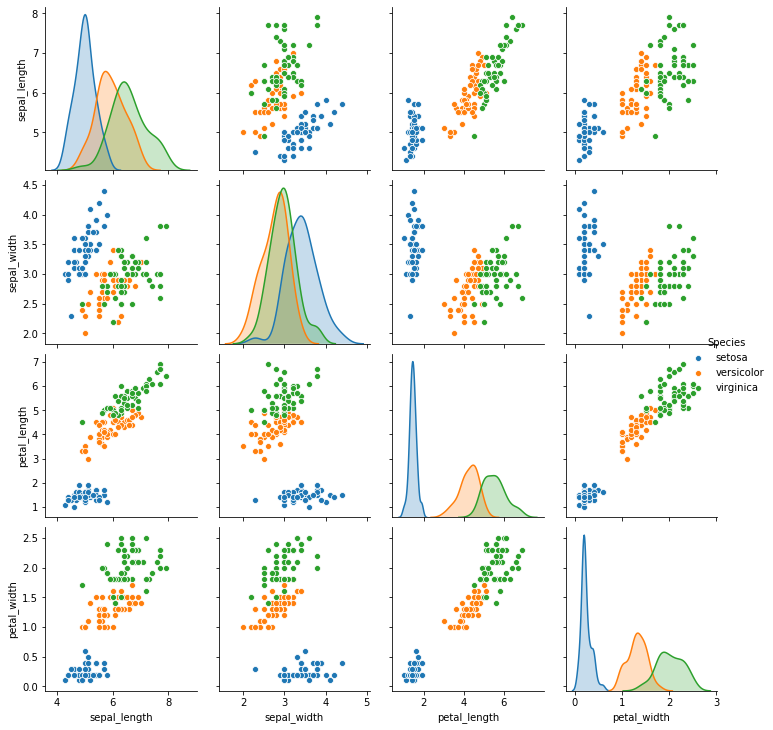

In [30]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

grid = sns.pairplot(df, hue='Species')

_ = [grid.fig.legends[0].texts[i].set_text(data.target_names[i]) for i in range(3)]

In [31]:
# ４つの特徴量に関する相関係数行列を作る

corr_iris = df.iloc[:, :-1].corr()

display(corr_iris)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


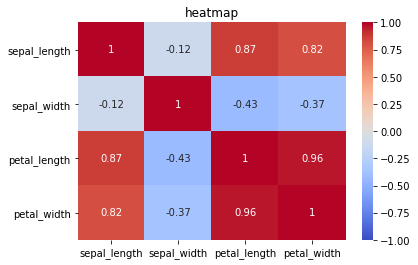

In [32]:
# 相関係数行列のヒートマップを作る

ax = sns.heatmap(corr_iris, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

_ = ax.set_title('heatmap')

# 問題8
## 可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

# 箱ひげ図/バイオリン図
全ての特徴量において、おおむね正規分布に従っていることがわかる。 
# 散布図
全体的に"setosa"と"versicolor/virginica"の二つのグループに分かれていることがはっきりと見てとれるため、この2グループ間での分類は高い精度で行えると考えられる。

一方、後者のグループ内"versicolor"と"versinica"の分類においては上述の分類よりも精度が下がることが予想される。

特に、`sepal_length`と`sepal_width`の散布図においては両種の分布はほぼ重なっているため、分類に有効な指標とはならない。
# 特徴量間の相関
`sepal_length`と`sepal_width`の間には**ほぼ相関は見られなかった**が、`petal_length`と`petal_width`の間には**非常に強い相関**が見られた。